# Linear Regression

>### [예제 8] Multi-Variable Multi-Output L.R.(TF)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
#Input(AGE, BMI) and Labels(HIGH, LOW)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[118,72],[125,80],[130,80],[118,76],[126,75],[123,79],[120,80],[124,85],[130,83],[122,78],[125,80],[130,81],[127,75],[130,79],[130,81],[125.5,80],[130,80],[138,82]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 2)), dtype=tf.float32)
B = tf.Variable(tf.random.normal((1, 2)), dtype=tf.float32)

In [3]:
# Min Max Scaler
x_input_org = x_input
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

In [4]:
# Hypothesis
def Hypothesis(x):
  return tf.matmul(x, W) + B

>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [5]:
def Cost():
  return tf.reduce_mean(tf.square(Hypothesis(x_input)-labels))

### 학습 (Training)

In [6]:
%%time
# Parameter Set
epochs = 2500
learning_rate = 0.05
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
      print("[{:>6}] cost={:>6.4}, W = [ {:>7.4} {:>7.4} {:>7.4} {:>7.4} ], B = {:>7.4}{:>7.4}".format(cnt, cost_graph[cnt], W[0][0], W[0][1], W[1][0],W[1][1], B[0][0],B[0][1]))
    
  optimizer.minimize(Cost,[W, B])  

[     0] cost=1.127e+04, W = [  -2.278  -1.105  -2.608 -0.6624 ], B =  0.8654  1.688
[   125] cost= 82.97, W = [   29.57   17.49   24.98   15.28 ], B =   96.59   61.3
[   250] cost= 30.99, W = [   21.24   11.81   16.94   9.901 ], B =   105.7  67.47
[   375] cost= 14.01, W = [   15.93   8.194   12.95   7.223 ], B =   110.9  70.98
[   500] cost= 8.312, W = [   12.64   5.963   10.89   5.839 ], B =   113.9   73.0
[   625] cost= 6.372, W = [   10.65   4.611   9.799     5.1 ], B =   115.6  74.16
[   750] cost= 5.707, W = [   9.454   3.801   9.199   4.696 ], B =   116.6  74.84
[   875] cost= 5.479, W = [   8.743    3.32   8.865    4.47 ], B =   117.2  75.23
[  1000] cost= 5.401, W = [   8.323   3.034   8.675   4.342 ], B =   117.5  75.46
[  1125] cost= 5.374, W = [   8.074   2.866   8.567   4.268 ], B =   117.7   75.6
[  1250] cost= 5.365, W = [   7.928   2.767   8.504   4.226 ], B =   117.9  75.68
[  1375] cost= 5.361, W = [   7.842   2.709   8.468   4.201 ], B =   117.9  75.72
[  1500] cost

>### Hypothesis Test 

In [7]:
print("[ Hypothesis test ]")

H_x = Hypothesis(x_input)
for x,h,l in zip(x_input_org, H_x, labels):
  print("Age:{}, BMI:{}=>BP:{:>7.4},{:>7.4} [label => {}]".format(x[0],x[1],h[0], h[1],l))

[ Hypothesis test ]
Age:25.0, BMI:22.0=>BP:  118.0,  75.79 [label => [118.  72.]]
Age:25.0, BMI:26.0=>BP:  122.2,  77.87 [label => [125.  80.]]
Age:25.0, BMI:30.0=>BP:  126.4,  79.96 [label => [130.  80.]]
Age:35.0, BMI:22.0=>BP:  119.6,  76.34 [label => [118.  76.]]
Age:35.0, BMI:26.0=>BP:  123.8,  78.42 [label => [126.  75.]]
Age:35.0, BMI:30.0=>BP:  128.0,   80.5 [label => [123.  79.]]
Age:45.0, BMI:22.0=>BP:  121.2,  76.88 [label => [120.  80.]]
Age:45.0, BMI:26.0=>BP:  125.4,  78.97 [label => [124.  85.]]
Age:45.0, BMI:30.0=>BP:  129.7,  81.05 [label => [130.  83.]]
Age:55.0, BMI:22.0=>BP:  122.8,  77.43 [label => [122.  78.]]
Age:55.0, BMI:26.0=>BP:  127.1,  79.51 [label => [125.  80.]]
Age:55.0, BMI:30.0=>BP:  131.3,   81.6 [label => [130.  81.]]
Age:65.0, BMI:22.0=>BP:  124.5,  77.98 [label => [127.  75.]]
Age:65.0, BMI:26.0=>BP:  128.7,  80.06 [label => [130.  79.]]
Age:65.0, BMI:30.0=>BP:  132.9,  82.14 [label => [130.  81.]]
Age:73.0, BMI:22.0=>BP:  125.7,  78.42 [label => [

In [8]:
# predict
def predict(x):
  return Hypothesis((x-x_min)/(x_max-x_min))

In [9]:
# predict
print("\n[ Prediction by specific data ]")
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = predict(x_test)
print("Age : {}, BMI : {} = > BP : {:>7.4}, {:>7.4}".format(x_test[0][0],x_test[0][1],H_x[0][0],H_x[0][1]))


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 = > BP :   125.2,   78.72


>### Plotting

<function matplotlib.pyplot.show>

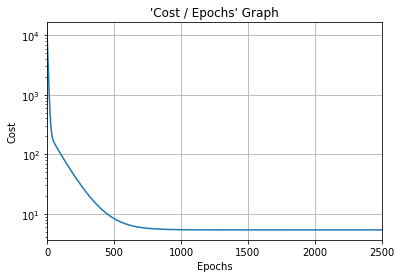

In [10]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show